# Regression Final Project

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
from csv import writer
import re
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Web Scraping

In [2]:
def house_scraping(url,csv):
    url = "https://www.hepsiemlak.com/ankara-kiralik"
    page = requests.get(url)
    
    soup = BeautifulSoup(page.content,'html.parser')
    lists = soup.find_all('li',class_="listing-item")
    
    with open(csv,'a',encoding='utf8',newline='') as f:
        csv_writer = writer(f)
        header = ['Description','Weekend','Area','Age','Floor','Price']
        csv_writer.writerow(header)
        for list in lists:
            description = list.find('header',class_ = 'list-view-header').text.replace('\n','')
            weekend = list.find('span',class_ = 'celly houseRoomCount').text.replace('\n','')
            area = list.find('span',class_ = 'celly squareMeter list-view-size').text.replace('\n','')
            age = list.find('span',class_ = 'celly buildingAge').text.replace('\n','')
            floor = list.find('span',class_ = 'celly floortype').text.replace('\n','')
            price = list.find('span',class_ = 'list-view-price').text.replace('\n','')
            info = [description,weekend,area,age,floor,price]
            csv_writer.writerow(info)

In [3]:
def county(name,page):

    for i in range(page):
        if i == 0:
            house_scraping(url=f"https://www.hepsiemlak.com/{name}-kiralik",csv=f"hepsiemlak_{name}.csv")
        else:
            house_scraping(url=f"https://www.hepsiemlak.com/{name}-kiralik?page={i+1}",csv=f"hepsiemlak_{name}.csv")

In [5]:
county("ankara",10)

In [2]:
df = pd.read_csv("hepsiemlak_ankara.csv")
df

,Description,Weekend,Area,Age,Floor,Price
0,NaN,3 + 1,135 m2,28 Yaşında,1. Kat,13.000 TL
1,"panora yakını, muhteşe...",4 + 2,220 m2,13 Yaşında,3. Kat,8.000 TL
2,"panora yakını, muhteşe...",4 + 2,220 m2,13 Yaşında,3. Kat,10.000 TL
3,vesta...bölgede marka ...,4 + 2,350 m2,4 Yaşında,15. Kat,15.500 TL
4,ets'den gölbaşı / gökç...,3 + 1,270 m2,Sıfır Bina,Bahçe Katı,8.500 TL
...,...,...,...,...,...,...
494,konya yoluna cepheli 3...,6 + 2,400 m2,20 Yaşında,NaN,16.900 TL
495,etimesgut alsancak mah...,3 + 1,135 m2,2 Yaşında,1. Kat,4.850 TL
496,güneşevler orta okulun...,3 + 1,140 m2,12 Yaşında,3. Kat,4.600 TL
497,yıldız emlak'tan kiral...,3 + 1,165 m2,16 Yaşında,4. Kat,10.500 TL


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  479 non-null    object
 1   Weekend      499 non-null    object
 2   Area         499 non-null    object
 3   Age          499 non-null    object
 4   Floor        479 non-null    object
 5   Price        499 non-null    object
dtypes: object(6)
memory usage: 23.5+ KB


In [4]:
df.isnull().sum()

Description    20
Weekend         0
Area            0
Age             0
Floor          20
Price           0
dtype: int64

In [5]:
df.columns

Index(['Description', 'Weekend', 'Area', 'Age', 'Floor', 'Price'], dtype='object')

In [6]:
df.Weekend.value_counts()

3 + 1      240
4 + 1      100
4 + 2       60
2 + 1       31
6 + 1       20
6 + 2       20
Weekend     19
1 + 1        9
Name: Weekend, dtype: int64

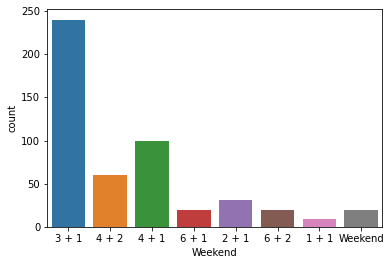

In [7]:
sns.countplot(df.Weekend);

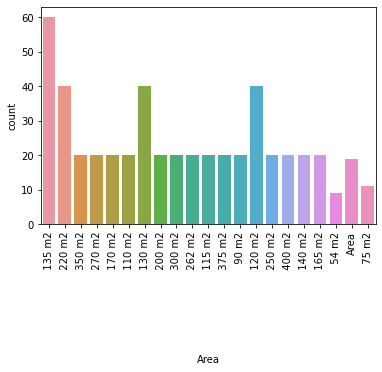

In [8]:
sns.countplot(df.Area);
plt.xticks(rotation=90);

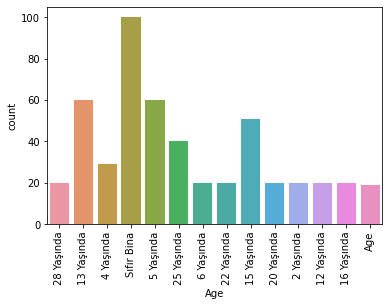

In [9]:
sns.countplot(df.Age);
plt.xticks(rotation=90);

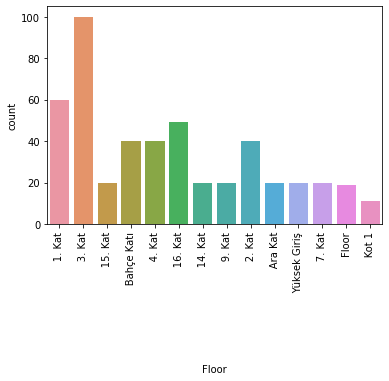

In [10]:
sns.countplot(df.Floor);
plt.xticks(rotation=90);

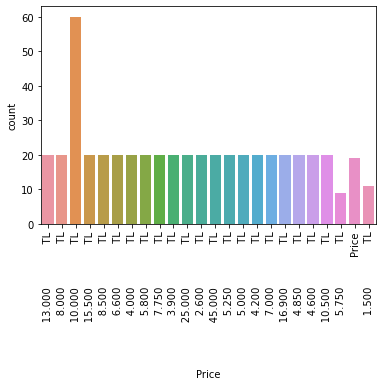

In [11]:
sns.countplot(df.Price);
plt.xticks(rotation=90);

## Feature Engineering

In [12]:
df['Weekend'].replace({'[^0-9]+':''},regex=True,inplace=True)

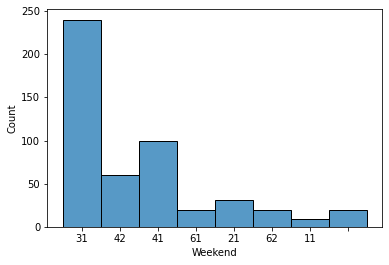

In [13]:
sns.histplot(df.Weekend);

In [14]:
for i in range(len(df)):
    try:
        df.Area.iloc[i] = int(re.split(r"\s+",df.Area.iloc[i])[1])
    except:
        
        pass
    
for i in range(len(df)):
    try:
        if type(df.Area.iloc[i]) == str:
            df = df.drop(i)
    except:
        pass

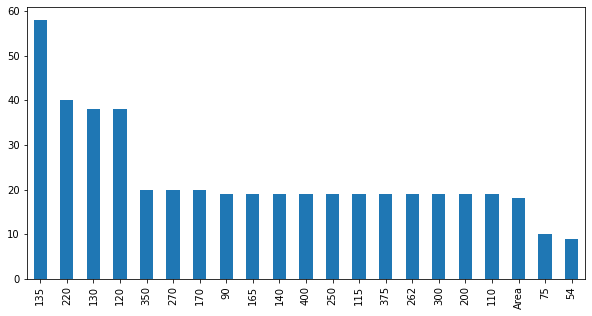

In [15]:
plt.figure(figsize=(10,5))
df["Area"].value_counts().plot.bar();

In [16]:
df.Age

0      28 Yaşında
1      13 Yaşında
2      13 Yaşında
3       4 Yaşında
4      Sıfır Bina
          ...    
494    20 Yaşında
495     2 Yaşında
496    12 Yaşında
497    16 Yaşında
498     4 Yaşında
Name: Age, Length: 480, dtype: object

In [17]:
df['Age'].replace({' Yaşında':'','Sıfır Bina':0},regex=True,inplace=True)

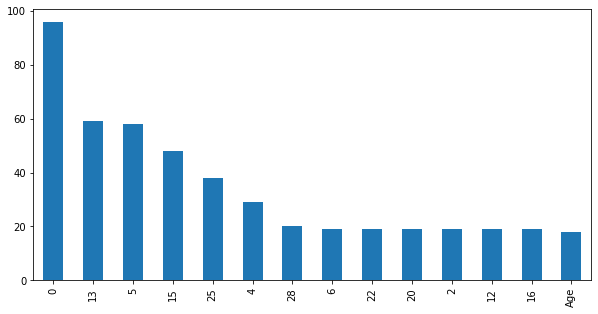

In [18]:
plt.figure(figsize=(10,5))
df["Age"].value_counts().plot.bar();

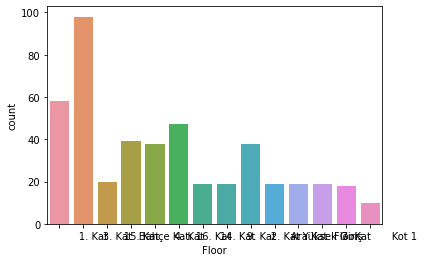

In [19]:
sns.countplot(df.Floor);

In [20]:
floor_list = []
for i in range(len(df)):
    try:
        df.Floor.iloc[i] = int(re.split(r"[-;,.\s]\s*",df.Floor.iloc[i])[1])
    except:
        pass

for i in range(len(df)):
    try:
        value = re.split(r"[-;,.\s]\s*",df.Floor.iloc[i])[1]
        if value == "Bahçe":
            df.Floor.iloc[i] = 0
        elif value == "Giriş":
            df.Floor.iloc[i] = 0
        elif value == "Yüksek":
            df.Floor.iloc[i] = 0
        elif value == "Zemin":
            df.Floor.iloc[i] = 0
    except:
        pass
    
k = 0
t = 0
for i in range(len(df)):
    if type(df.Floor.iloc[i]) == int:
        k = k + df.Floor.iloc[i]
        t = t + 1
mid_layer = int(k/t)
for i in range(len(df)):
    try:
        value = re.split(r"[-;,.\s]\s*",df.Floor.iloc[i])[1]
        if value == "Ara":
            df.Floor.iloc[i] = mid_layer
        elif value == "Çatı":
            df.Floor.iloc[i]=15
        elif value == "Teras":
            df.Floor.iloc[i]=15
        elif value == "Kot 1":
            df.Floor.iloc[i]=1            
        elif value == "Kot 2":
            df.Floor.iloc[i]=2            
        elif value == "Kot 3":
            df.Floor.iloc[i]=3            
        elif value == "Villa Katı":
            df.Floor.iloc[i]=3            
            
        elif value == "En":
            df.Floor.iloc[i] = 15
    except:
        pass
    
    
drop_list = []
for i in range(len(df)):
    if type(df.Floor.iloc[i]) == str:
        drop_list.append(i)
df = df.drop(df.index[[drop_list]])

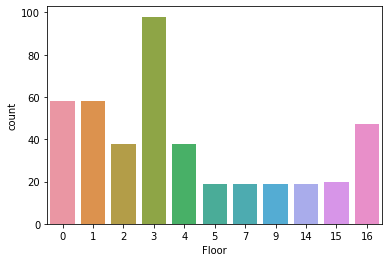

In [21]:
sns.countplot(df.Floor);

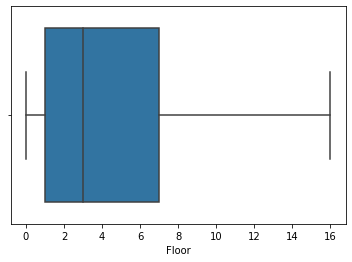

In [22]:
sns.boxplot(df.Floor);

In [23]:
for i in range(len(df)):
    value = re.split(r"[-;,.\s]\s*",df.Price.iloc[i])[1:3]
    df.Price.iloc[i] = int(value[0]) * 1000

In [25]:
df.Price

0      13000
1       8000
2      10000
3      15000
4       8000
       ...  
494    16000
495     4000
496     4000
497    10000
498     5000
Name: Price, Length: 452, dtype: object

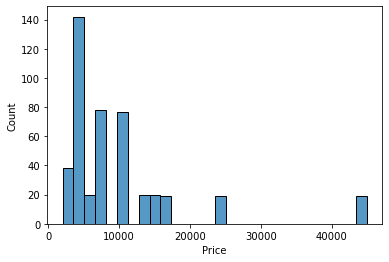

In [24]:
sns.histplot(df.Price);

In [27]:
df.head()

,Description,Weekend,Area,Age,Floor,Price
0,NaN,31,135,28,1,13000
1,"panora yakını, muhteşe...",42,220,13,3,8000
2,"panora yakını, muhteşe...",42,220,13,3,10000
3,vesta...bölgede marka ...,42,350,4,15,15000
4,ets'den gölbaşı / gökç...,31,270,0,0,8000


In [33]:
columns = ['Weekend','Area','Age','Price']
for col in columns:
    df[col] = df[col].astype("float")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 498
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  432 non-null    object 
 1   Weekend      452 non-null    float64
 2   Area         452 non-null    float64
 3   Age          452 non-null    float64
 4   Floor        433 non-null    object 
 5   Price        452 non-null    float64
dtypes: float64(4), object(2)
memory usage: 24.7+ KB


In [36]:
df.Description.head(15)

0                                                   NaN
1                             panora yakını, muhteşe...
2                             panora yakını, muhteşe...
3                             vesta...bölgede marka ...
4                             ets'den gölbaşı / gökç...
5                             ets'den cevizlidere ca...
6                             mamak yeşilbayır kiral...
7                             çayyolu merkezde arcad...
8                             "evinbizden" söğüt bah...
9                             mareşal çakmak mahalle...
10                            portakal çiçeği vadisi...
11                            bağlıca'da site içeris...
12                            kafkaslarda 3+1 yapılı...
13                            vıp desıgned fully fur...
14                            uyanış'ta 1.kat 2+1 sı...
Name: Description, dtype: object

## Data Cleaning

In [37]:
df['Description']=df['Description'].str.lower()
df['Description']=df['Description'].str.replace("[^\w\s]","")
df['Description']=df['Description'].str.replace("\d+","")
df['Description']=df['Description'].str.replace("\n"," ").replace("\r","")
df['Description']=df['Description'].str.replace("   ", "")

In [38]:
df.Description

0                                                    NaN
1      panora yakını muhteşem manzaralı dubleks m ter...
2      panora yakını muhteşem  mobilyalı mteraslı muh...
3      vestabölgede marka olmuş ultralüx sitedegüvenl...
4      etsden gölbaşı  gökçehöyük zara beydağı sitesi...
                             ...                        
494    konya yoluna cepheli  katlı alt katı işyeriüst...
495      etimesgut alsancak mahallesinde  kiralık daire 
496        güneşevler orta okuluna yakın  kıralık daire 
497                      yıldız emlaktan kiralık  daire 
498           west gate residence kiralık eşyalı  daire 
Name: Description, Length: 452, dtype: object

In [55]:
df.isna().sum()

Description    19
Weekend         0
Area            0
Age             0
Floor          19
Price           0
dtype: int64

In [56]:
df.dropna(inplace=True)

In [57]:
df.isna().sum()

Description    0
Weekend        0
Area           0
Age            0
Floor          0
Price          0
dtype: int64

In [58]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [59]:
from wordcloud import WordCloud
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=100).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

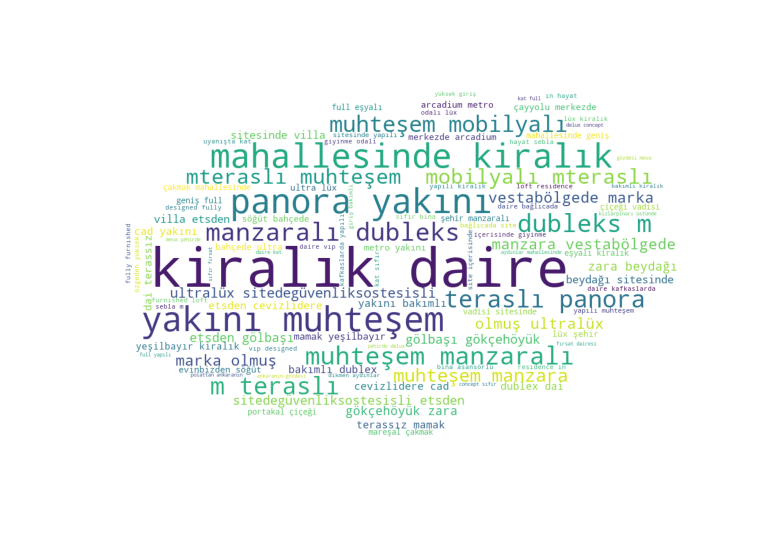

In [60]:
wc(df["Description"],'white')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 1 to 498
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  413 non-null    object 
 1   Weekend      413 non-null    float64
 2   Area         413 non-null    float64
 3   Age          413 non-null    float64
 4   Floor        413 non-null    object 
 5   Price        413 non-null    float64
dtypes: float64(4), object(2)
memory usage: 22.6+ KB


In [63]:
df.Floor = df.Floor.astype(float)

## Regression

In [64]:
x=df.drop(["Description","Price"],axis=1)
y=df.Price

In [65]:
def regression(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [105]:
regression(x,y)

,R_Squared,RMSE,MAE
ExtraTreeRegressor,0.998621,268.866429,72.289157
GradientBoostingRegressor,0.998585,272.317800,105.686188
KNeighborsRegressor,0.998566,274.191034,72.289157
Ridge,0.456603,5337.305601,4287.777611
Lasso,0.418444,5521.523516,4389.046175
LinearRegression,0.417570,5525.674062,4391.938916
ElasticNet,0.237003,6324.478151,4430.548331


## Deep Learning

In [120]:
x = scaler.fit_transform(x)

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)

In [122]:
model=Sequential()

model.add(Dense(8192, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')

In [123]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),verbose=1,epochs=600)

Epoch 1/600
10/10 [==============================] - 3s 204ms/step - loss: 181868896.0000 - val_loss: 74672456.0000
Epoch 2/600
10/10 [==============================] - 2s 197ms/step - loss: 78667928.0000 - val_loss: 51343948.0000
Epoch 3/600
10/10 [==============================] - 2s 198ms/step - loss: 77685144.0000 - val_loss: 41323384.0000
Epoch 4/600
10/10 [==============================] - 2s 192ms/step - loss: 76192552.0000 - val_loss: 33149674.0000
Epoch 5/600
10/10 [==============================] - 2s 198ms/step - loss: 45304744.0000 - val_loss: 32797902.0000
Epoch 6/600
10/10 [==============================] - 2s 201ms/step - loss: 38949484.0000 - val_loss: 27147698.0000
Epoch 7/600
10/10 [==============================] - 2s 199ms/step - loss: 43924068.0000 - val_loss: 24935634.0000
Epoch 8/600
10/10 [==============================] - 2s 194ms/step - loss: 27783810.0000 - val_loss: 26242924.0000
Epoch 9/600
10/10 [==============================] - 2s 192ms/step - loss: 2203

10/10 [==============================] - 2s 198ms/step - loss: 823972.7500 - val_loss: 979838.2500
Epoch 74/600
10/10 [==============================] - 2s 197ms/step - loss: 684073.2500 - val_loss: 431870.2188
Epoch 75/600
10/10 [==============================] - 2s 196ms/step - loss: 495670.6875 - val_loss: 378456.4375
Epoch 76/600
10/10 [==============================] - 2s 199ms/step - loss: 386232.6250 - val_loss: 243597.8438
Epoch 77/600
10/10 [==============================] - 2s 199ms/step - loss: 494212.7188 - val_loss: 383665.4688
Epoch 78/600
10/10 [==============================] - 2s 204ms/step - loss: 851824.2500 - val_loss: 998009.0625
Epoch 79/600
10/10 [==============================] - 2s 204ms/step - loss: 1092638.5000 - val_loss: 535711.6875
Epoch 80/600
10/10 [==============================] - 2s 205ms/step - loss: 722665.6875 - val_loss: 904041.5000
Epoch 81/600
10/10 [==============================] - 2s 202ms/step - loss: 1010267.8750 - val_loss: 794095.5000
Epo

10/10 [==============================] - 2s 198ms/step - loss: 171266.7344 - val_loss: 173430.4219
Epoch 146/600
10/10 [==============================] - 2s 198ms/step - loss: 149810.6562 - val_loss: 127211.8281
Epoch 147/600
10/10 [==============================] - 2s 196ms/step - loss: 134732.3281 - val_loss: 94761.7812
Epoch 148/600
10/10 [==============================] - 2s 197ms/step - loss: 124385.1797 - val_loss: 101303.3438
Epoch 149/600
10/10 [==============================] - 2s 198ms/step - loss: 124737.5469 - val_loss: 133488.4844
Epoch 150/600
10/10 [==============================] - 2s 211ms/step - loss: 157474.3906 - val_loss: 95721.5156
Epoch 151/600
10/10 [==============================] - 2s 210ms/step - loss: 124797.1484 - val_loss: 88864.6172
Epoch 152/600
10/10 [==============================] - 2s 208ms/step - loss: 118446.9453 - val_loss: 97739.1953
Epoch 153/600
10/10 [==============================] - 2s 203ms/step - loss: 140418.0625 - val_loss: 140008.9375
E

10/10 [==============================] - 2s 197ms/step - loss: 169796.8438 - val_loss: 1531512.7500
Epoch 218/600
10/10 [==============================] - 2s 196ms/step - loss: 1561122.7500 - val_loss: 2996125.2500
Epoch 219/600
10/10 [==============================] - 2s 195ms/step - loss: 1479353.7500 - val_loss: 1092900.2500
Epoch 220/600
10/10 [==============================] - 2s 197ms/step - loss: 843707.1250 - val_loss: 623085.0625
Epoch 221/600
10/10 [==============================] - 2s 199ms/step - loss: 520771.8750 - val_loss: 1442393.3750
Epoch 222/600
10/10 [==============================] - 2s 203ms/step - loss: 4818541.5000 - val_loss: 7066671.5000
Epoch 223/600
10/10 [==============================] - 2s 211ms/step - loss: 4090008.0000 - val_loss: 1216305.2500
Epoch 224/600
10/10 [==============================] - 2s 205ms/step - loss: 843743.2500 - val_loss: 147992.3594
Epoch 225/600
10/10 [==============================] - 2s 198ms/step - loss: 292711.6562 - val_loss:

Epoch 289/600
10/10 [==============================] - 2s 192ms/step - loss: 263870.6562 - val_loss: 244091.9844
Epoch 290/600
10/10 [==============================] - 2s 195ms/step - loss: 609362.9375 - val_loss: 567946.1875
Epoch 291/600
10/10 [==============================] - 2s 196ms/step - loss: 1070280.2500 - val_loss: 209701.0312
Epoch 292/600
10/10 [==============================] - 2s 202ms/step - loss: 370084.0312 - val_loss: 256865.6250
Epoch 293/600
10/10 [==============================] - 2s 202ms/step - loss: 243977.7656 - val_loss: 289006.2188
Epoch 294/600
10/10 [==============================] - 2s 205ms/step - loss: 241699.0156 - val_loss: 196322.0938
Epoch 295/600
10/10 [==============================] - 2s 207ms/step - loss: 198543.7969 - val_loss: 162878.4219
Epoch 296/600
10/10 [==============================] - 2s 202ms/step - loss: 164653.4688 - val_loss: 148135.5781
Epoch 297/600
10/10 [==============================] - 2s 198ms/step - loss: 161382.7344 - val_

10/10 [==============================] - 2s 198ms/step - loss: 119349.8672 - val_loss: 98656.9375
Epoch 362/600
10/10 [==============================] - 2s 194ms/step - loss: 113682.1328 - val_loss: 87973.9766
Epoch 363/600
10/10 [==============================] - 2s 195ms/step - loss: 111766.5000 - val_loss: 113742.6484
Epoch 364/600
10/10 [==============================] - 2s 195ms/step - loss: 155475.2188 - val_loss: 134128.5938
Epoch 365/600
10/10 [==============================] - 2s 192ms/step - loss: 172766.1875 - val_loss: 195479.9844
Epoch 366/600
10/10 [==============================] - 2s 206ms/step - loss: 150086.0000 - val_loss: 127915.6562
Epoch 367/600
10/10 [==============================] - 2s 204ms/step - loss: 126315.5312 - val_loss: 108298.8047
Epoch 368/600
10/10 [==============================] - 2s 206ms/step - loss: 121859.2266 - val_loss: 88423.4531
Epoch 369/600
10/10 [==============================] - 2s 195ms/step - loss: 111183.4531 - val_loss: 88012.4609
E

10/10 [==============================] - 2s 200ms/step - loss: 112297.9062 - val_loss: 89951.7266
Epoch 434/600
10/10 [==============================] - 2s 200ms/step - loss: 113339.3750 - val_loss: 93942.9531
Epoch 435/600
10/10 [==============================] - 2s 192ms/step - loss: 110675.6484 - val_loss: 90413.1172
Epoch 436/600
10/10 [==============================] - 2s 188ms/step - loss: 112904.4375 - val_loss: 88313.7734
Epoch 437/600
10/10 [==============================] - 2s 192ms/step - loss: 110591.6094 - val_loss: 88590.3984
Epoch 438/600
10/10 [==============================] - 2s 190ms/step - loss: 111925.5469 - val_loss: 104926.3516
Epoch 439/600
10/10 [==============================] - 2s 191ms/step - loss: 119738.3125 - val_loss: 109238.8281
Epoch 440/600
10/10 [==============================] - 2s 199ms/step - loss: 120555.9453 - val_loss: 108100.0156
Epoch 441/600
10/10 [==============================] - 2s 195ms/step - loss: 132541.4531 - val_loss: 95568.7422
Epo

Epoch 506/600
10/10 [==============================] - 2s 198ms/step - loss: 122374.3359 - val_loss: 87045.6172
Epoch 507/600
10/10 [==============================] - 2s 199ms/step - loss: 116879.5859 - val_loss: 249078.0938
Epoch 508/600
10/10 [==============================] - 2s 200ms/step - loss: 312219.5625 - val_loss: 215008.5469
Epoch 509/600
10/10 [==============================] - 2s 198ms/step - loss: 229638.4062 - val_loss: 163308.2188
Epoch 510/600
10/10 [==============================] - 2s 191ms/step - loss: 165107.3281 - val_loss: 147708.4219
Epoch 511/600
10/10 [==============================] - 2s 190ms/step - loss: 187055.3906 - val_loss: 107408.5156
Epoch 512/600
10/10 [==============================] - 2s 190ms/step - loss: 132953.3125 - val_loss: 130870.1641
Epoch 513/600
10/10 [==============================] - 2s 191ms/step - loss: 119227.7109 - val_loss: 100963.6875
Epoch 514/600
10/10 [==============================] - 2s 191ms/step - loss: 135066.8438 - val_lo

10/10 [==============================] - 2s 189ms/step - loss: 115476.7188 - val_loss: 93296.8047
Epoch 579/600
10/10 [==============================] - 2s 192ms/step - loss: 110260.5469 - val_loss: 83497.5000
Epoch 580/600
10/10 [==============================] - 2s 192ms/step - loss: 106178.0391 - val_loss: 82899.2422
Epoch 581/600
10/10 [==============================] - 2s 198ms/step - loss: 108250.6016 - val_loss: 100875.7344
Epoch 582/600
10/10 [==============================] - 2s 199ms/step - loss: 119090.7969 - val_loss: 86964.8125
Epoch 583/600
10/10 [==============================] - 2s 197ms/step - loss: 114137.4141 - val_loss: 117425.5547
Epoch 584/600
10/10 [==============================] - 2s 197ms/step - loss: 131188.3906 - val_loss: 84837.8516
Epoch 585/600
10/10 [==============================] - 2s 188ms/step - loss: 118921.8672 - val_loss: 258508.0781
Epoch 586/600
10/10 [==============================] - 2s 190ms/step - loss: 271347.6562 - val_loss: 206304.3281
Ep

In [124]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 8192)              40960     
                                                                 
 dense_85 (Dense)            (None, 4096)              33558528  
                                                                 
 dense_86 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_87 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_88 (Dense)            (None, 512)               524800    
                                                                 
 dense_89 (Dense)            (None, 256)               131328    
                                                                 
 dense_90 (Dense)            (None, 128)             

In [125]:
pred = model.predict(x_test)

4/4 [==============================] - 0s 26ms/step


In [126]:
pred

array([[ 7985.3965],
       [ 5081.6045],
       [24923.47  ],
       [ 7985.3965],
       [ 6992.9604],
       [ 6992.9604],
       [ 3061.657 ],
       [ 3999.2866],
       [24923.47  ],
       [24923.47  ],
       [ 7985.3965],
       [ 6976.9897],
       [ 9979.268 ],
       [44855.414 ],
       [ 3988.0217],
       [ 3061.657 ],
       [ 4998.8994],
       [14931.353 ],
       [ 9065.73  ],
       [ 6992.9604],
       [ 9065.73  ],
       [24923.47  ],
       [ 9991.71  ],
       [ 5973.433 ],
       [ 5081.6045],
       [ 2020.011 ],
       [ 9991.71  ],
       [ 5062.438 ],
       [ 9991.71  ],
       [ 4998.8994],
       [ 3061.657 ],
       [ 4998.9   ],
       [ 9065.73  ],
       [ 4027.361 ],
       [ 2020.011 ],
       [ 3061.657 ],
       [ 3999.2866],
       [ 3999.2866],
       [ 2020.011 ],
       [ 2020.011 ],
       [ 4027.361 ],
       [ 3988.0217],
       [ 9065.73  ],
       [14931.353 ],
       [ 5973.433 ],
       [ 9985.401 ],
       [ 3061.657 ],
       [ 4998

In [127]:
(mean_squared_error(y_test, pred))**.5

291.38294496120227

In [128]:
r2_score(y_test, pred)

0.9986514414710623